# Lomb-Scargle Analysis

Overview:
* Imports
* Helper Functions
* Simple Case
* Options
* MultiBand LS
* Examples

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle



In [9]:
# Helper functions

# read-in synthetic type files, with report of some statistics
def syn_read(fname):
    """
    add info later
    """
    data = pd.read_csv(fname, sep = ' ')
    print('File name for light curve',fname)
    print('Number of Observations: ',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))

    return data
    

# read-in Kelly's lightcurves
def load_lcfile(fname):
    """
    add info later
    """
    data = pd.read_csv(fname,sep=' ',header=None)
    data.columns = ['Time','Phase','Flux','err','band']
    print('File name for light curve',fname)
    print('Number of Observations: ',len(data))
    print('Brightness range:',np.min(data['Flux']),np.max(data['Flux']))
    print('Time range:',np.min(data['Time']),np.max(data['Time']))


    return data


# read-in Rubin style lightcurve
#coming soon


# plotting single lightcurve
def lc_plot(data,**kwargs):
    plt.plot(data['Time'],data['Flux'],'ob-',**kwargs)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    
    return



# plotting multiband lightcurve




## Lomb-Scargle

File name for light curve ./syn_data/syn_18.txt
Number of Observations:  100
Brightness range: 11.0000000001757 12.999977619747714
Time range: 0.2278325535801744 96.29509079640025


Text(0.5, 1.0, 'Light curve file: ./syn_data/syn_18.txt')

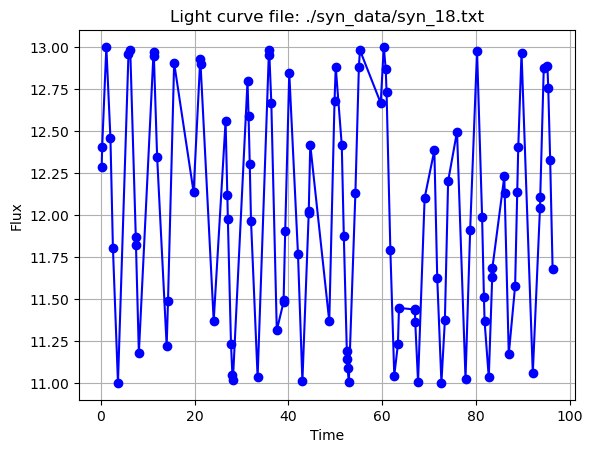

In [44]:
#
file = './syn_data/syn_18.txt'
data = syn_read(file)
lc_plot(data)
plt.title('Light curve file: '+ file)

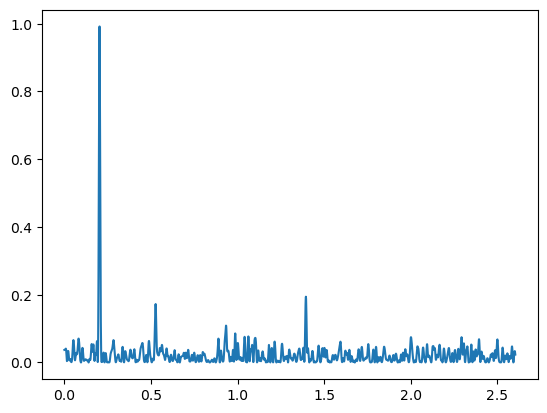

In [45]:
freq,power = LombScargle(data['Time'],data['Flux']).autopower(samples_per_peak=10)
plt.plot(freq,power)
#plt.xlim(0.15,0.25)

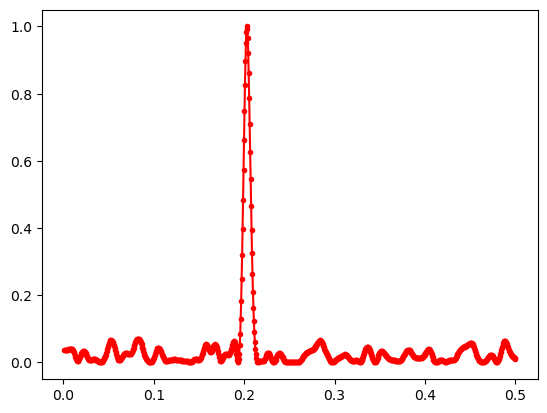

In [48]:
freq,power = LombScargle(data['Time'],data['Flux']).autopower(minimum_frequency=0.001, maximum_frequency=0.5,
    samples_per_peak=20)
plt.plot(freq,power,'.r-')
#plt.xlim(0.15,0.25)

In [50]:
ind_max_power = power.argmax()
period = 1/freq[ind_max_power]
print('Peak period',period)

Peak period 4.927519841326123
